In [1]:
pip install tensorflow numpy matplotlib opencv-python


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#pip cache purge
#pip install --upgrade pip setuptools wheel
#pip install tensorflow==2.18.0 keras==3.8.0 protobuf==4.25.3 pillow==10.3.0


In [11]:
pip uninstall -y tensorflow keras protobuf pillow && pip install tensorflow==2.18.0 keras==3.8.0 protobuf==4.25.3 pillow==10.3.0


Note: you may need to restart the kernel to use updated packages.
Found existing installation: protobuf 3.20.3
Uninstalling protobuf-3.20.3:
  Successfully uninstalled protobuf-3.20.3
Found existing installation: Pillow 9.5.0
Uninstalling Pillow-9.5.0:
  Successfully uninstalled Pillow-9.5.0


ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\y. karthik reddy\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_internal\cli\base_command.py", line 160, in exc_logging_wrapper
    status = run_func(*args)
  File "c:\Users\y. karthik reddy\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_internal\commands\uninstall.py", line 110, in run
    uninstall_pathset.commit()
  File "c:\Users\y. karthik reddy\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_internal\req\req_uninstall.py", line 424, in commit
    self._moved_paths.commit()
  File "c:\Users\y. karthik reddy\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_internal\req\req_uninstall.py", line 277, in commit
    save_dir.cleanup()
  File "c:\Users\y. karthik reddy\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_internal\utils\temp_dir.py", line 173, in cleanup
    rmtree(self._path)
  File "c:\Users\y. karthik reddy\AppData\Local\Programs\

In [1]:
import os
import shutil
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:


# Define paths
original_dataset_dir = r"C:\Users\y. karthik reddy\OneDrive\Desktop\Leaf-lens\Indian Medicinal Leaves Image Datasets\Medicinal Leaf dataset"
split_dataset_dir = r"C:\Users\y. karthik reddy\OneDrive\Desktop\Leaf-lens\dataset_split"
train_dir = os.path.join(split_dataset_dir, "train")
test_dir = os.path.join(split_dataset_dir, "test")

# Create train and test directories
for folder in [train_dir, test_dir]:
    os.makedirs(folder, exist_ok=True)

# Split ratio
train_ratio = 0.9  # 90% train, 10% test

# Copy images to train and test folders
for category in os.listdir(original_dataset_dir):
    category_path = os.path.join(original_dataset_dir, category)
    
    if not os.path.isdir(category_path):  # Ignore non-folder files
        continue

    images = os.listdir(category_path)
    random.shuffle(images)

    train_size = int(len(images) * train_ratio)

    # Create category subfolders in train and test
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

    # Copy files to train and test folders
    for i, img in enumerate(images):
        src_path = os.path.join(category_path, img)
        if i < train_size:
            dst_path = os.path.join(train_dir, category, img)
        else:
            dst_path = os.path.join(test_dir, category, img)
        shutil.copy(src_path, dst_path)

print("✅ Data split complete! (90% Train, 10% Test)")

✅ Data split complete! (90% Train, 10% Test)


In [3]:

# Define paths
original_dataset_dir = r"C:\Users\y. karthik reddy\OneDrive\Desktop\Leaf-lens\Indian Medicinal Leaves Image Datasets\Medicinal Leaf dataset"
split_dataset_dir = r"C:\Users\y. karthik reddy\OneDrive\Desktop\Leaf-lens\dataset_split"
train_dir = os.path.join(split_dataset_dir, "train")
test_dir = os.path.join(split_dataset_dir, "test")

# Define data generators
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Create train and test data loaders
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical'
)

# Load Xception model (pre-trained)
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base layers

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Build and compile the model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Found 6175 images belonging to 80 classes.
Found 725 images belonging to 80 classes.


In [8]:
# Train the model
history = model.fit(train_generator,
                    validation_data=test_generator,
                    epochs=30,
                    batch_size=32)

# Fine-tune (Unfreeze base model and train again)
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_fine = model.fit(train_generator,
                         validation_data=test_generator,
                         epochs=20,
                         batch_size=32)

# Save model
output_model_path = r"C:\Users\y. karthik reddy\OneDrive\Desktop\Leaf-lens\medicinal_plants_xception.h5"
model.save(output_model_path)

c:\Users\y. karthik reddy\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 448s 2s/step - accuracy: 0.0473 - loss: 4.2698 - val_accuracy: 0.1848 - val_loss: 3.7043
Epoch 2/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 403s 2s/step - accuracy: 0.2267 - loss: 3.4831 - val_accuracy: 0.3021 - val_loss: 2.9159
Epoch 3/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 398s 2s/step - accuracy: 0.3365 - loss: 2.8183 - val_accuracy: 0.3834 - val_loss: 2.4549
Epoch 4/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 397s 2s/step - accuracy: 0.4204 - loss: 2.3976 - val_accuracy: 0.4469 - val_loss: 2.1128
Epoch 5/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 397s 2s/step - accuracy: 0.4798 - loss: 2.0875 - val_accuracy: 0.4607 - val_loss: 1.9381
Epoch 6/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 395s 2s/step - accuracy: 0.5343 - loss: 1.8622 - val_accuracy: 0.5159 - val_loss: 1.7710
Epoch 7/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 396s 2s/step - accuracy: 0.5732 - loss: 1.6611 - val_accuracy: 0.5393 - val_loss: 1.6596
Epoch 8/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 397s 2s/step - accuracy: 0.6052 - loss: 1.5665 - val_accu

In [4]:
import tensorflow as tf
import numpy as np
import os
from sklearn.metrics import accuracy_score

# Load the trained model
MODEL_PATH = r"C:\Users\y. karthik reddy\OneDrive\Desktop\Leaf-lens\medicinal_plants_xception.h5"
model = tf.keras.models.load_model(MODEL_PATH)

# Define test dataset path
TEST_DIR = r"C:\Users\y. karthik reddy\OneDrive\Desktop\Leaf-lens\dataset_split\test"

# Image properties
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Load test data using ImageDataGenerator
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255.0)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Keep order to match labels correctly
)

# Get true labels
y_true = test_generator.classes  # True labels

# Get predictions
y_pred_prob = model.predict(test_generator)  # Probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class indices

# Calculate Accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print Accuracy
print(f"Model Accuracy on Test Data: {accuracy * 100:.2f}%")


Found 725 images belonging to 80 classes.


c:\Users\y. karthik reddy\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step
Model Accuracy on Test Data: 93.24%


In [5]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Classification Report:
                          precision    recall  f1-score   support

               Aloevera       1.00      1.00      1.00        12
                   Amla       1.00      0.86      0.92         7
           Amruta_Balli       1.00      0.90      0.95        10
                  Arali       0.90      1.00      0.95         9
                 Ashoka       1.00      0.89      0.94         9
             Astma_weed       0.89      0.89      0.89         9
               Badipala       1.00      0.88      0.93         8
           Balloon_Vine       1.00      0.86      0.92         7
                 Bamboo       1.00      0.92      0.96        12
                  Beans       1.00      1.00      1.00        10
                  Betel       1.00      1.00      1.00        12
                 Brahmi       1.00      0.91      0.95        11
             Bringaraja       0.70      0.88      0.78         8
             Caricature       1.00      1.00      1.00         8


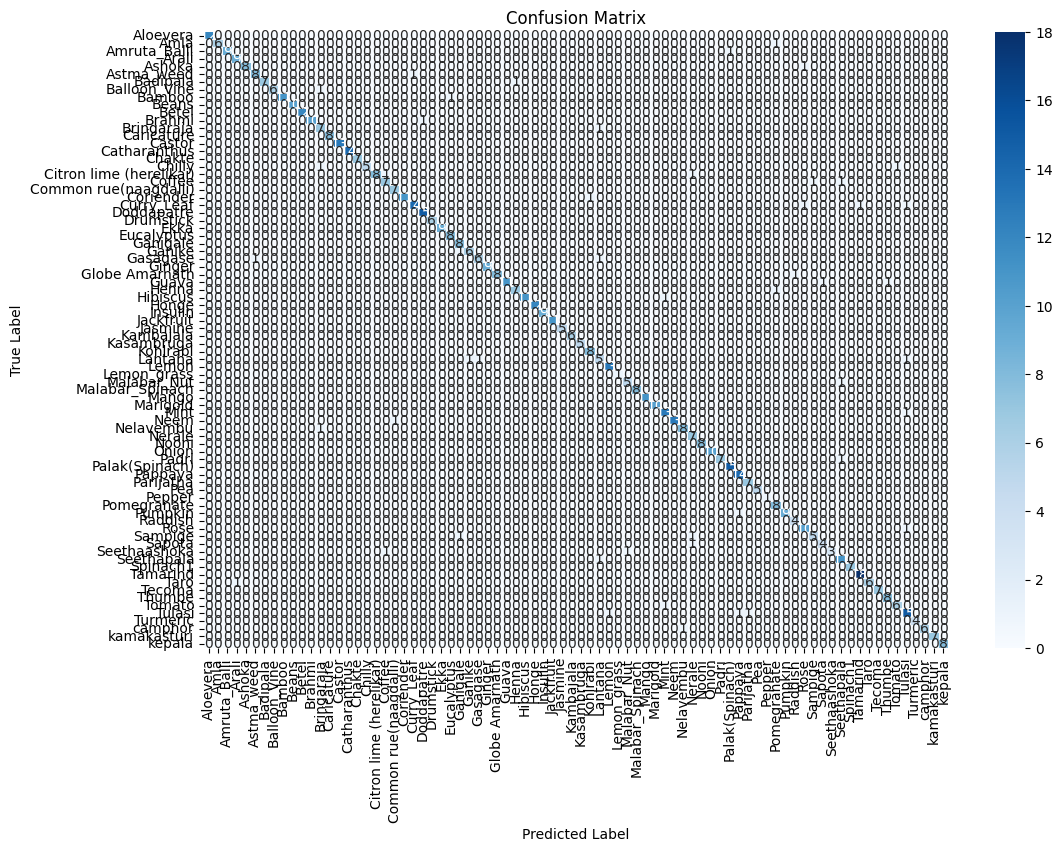

C:\Users\y. karthik reddy\AppData\Local\Temp\ipykernel_1468\182712267.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="viridis")


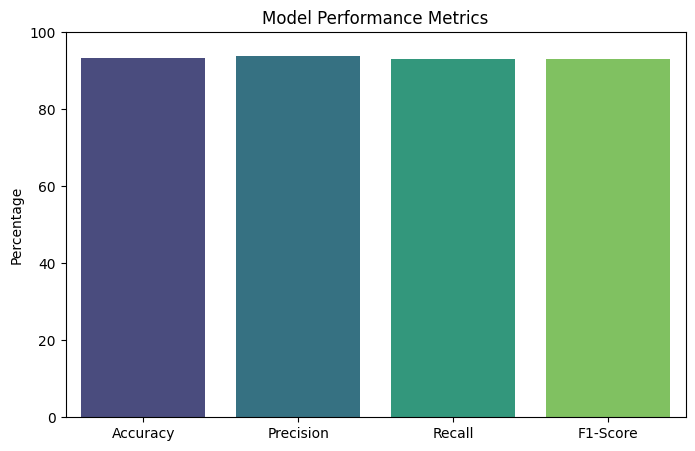

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Get class names from the test generator
class_names = list(test_generator.class_indices.keys())

# Generate Classification Report
class_report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n", class_report)

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Extract Precision, Recall, and F1-score from classification report
report_dict = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
precision = np.mean([report_dict[label]['precision'] for label in class_names])
recall = np.mean([report_dict[label]['recall'] for label in class_names])
f1_score = np.mean([report_dict[label]['f1-score'] for label in class_names])

# Performance Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy * 100, precision * 100, recall * 100, f1_score * 100]

# Plot Performance Metrics
plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values, palette="viridis")
plt.ylabel("Percentage")
plt.title("Model Performance Metrics")
plt.ylim(0, 100)
plt.show()


In [7]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [ ]:
from tensorflow.keras.models import load_model, save_model

model = load_model("medicinal_plants_xception.h5", compile=False)
model.save("converted_model.h5", save_format='h5')


Found 725 images belonging to 80 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step


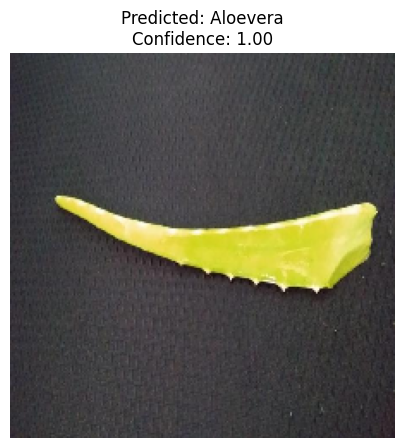

Predicted Plant: Aloevera, Confidence: 1.00


In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load the trained model
MODEL_PATH = r"C:\Users\y. karthik reddy\OneDrive\Desktop\Leaf-lens\medicinal_plants_xception.h5"
model = tf.keras.models.load_model(MODEL_PATH)

# Define test dataset path
TEST_DIR = r"C:\Users\y. karthik reddy\OneDrive\Desktop\Leaf-lens\dataset_split\test"

# Load class labels from test dataset
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255.0)
test_generator = test_datagen.flow_from_directory(TEST_DIR, target_size=(224, 224), batch_size=1, class_mode='categorical', shuffle=False)

# Reverse class indices to map predictions to class names
class_indices = test_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}

def predict_and_show_image(image_path, model):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Rescale
    
    # Make prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)  # Get index of highest probability
    predicted_class = class_labels[predicted_class_index]  # Map to class name
    confidence = predictions[0][predicted_class_index]  # Get confidence score
    
    # Display the image with prediction
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}")
    plt.show()
    
    return predicted_class, confidence

# Example: Provide an image path from the test dataset
image_path = r"C:\Users\y. karthik reddy\OneDrive\Desktop\Leaf-lens\dataset_split\test\Aloevera\112.jpg"

predicted_plant, confidence = predict_and_show_image(image_path, model)
print(f"Predicted Plant: {predicted_plant}, Confidence: {confidence:.2f}")


In [15]:
mkdir backend frontend


In [20]:
pip show tensorflow numpy matplotlib opencv-python tensorflow-intel libclang termcolor setuptools absl-py protobuf ml-dtypes typing-extensions tensorboard gast keras tensorflow-io-gcs-filesystem flatbuffers grpcio h5py astunparse wrapt opt-einsum requests packaging six markdown-it-py pygments mdurl


Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\y. karthik reddy\appdata\local\programs\python\python310\lib\site-packages
Requires: tensorflow-intel
Required-by: 
---
Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are
        met:
        
            * Redistributions of source code must retain the above copyright
               notice, this list of conditions and the following disclaimer.
        
            * Redistributions in binar

In [2]:
import os

# Define the test dataset path
TEST_DIR = r"C:\Users\y. karthik reddy\OneDrive\Desktop\Leaf-lens\dataset_split\test"

# Extract class labels from folder names
class_labels = [folder for folder in os.listdir(TEST_DIR) if os.path.isdir(os.path.join(TEST_DIR, folder))]

print("Extracted class labels:", class_labels)


Extracted class labels: ['Aloevera', 'Amla', 'Amruta_Balli', 'Arali', 'Ashoka', 'Astma_weed', 'Badipala', 'Balloon_Vine', 'Bamboo', 'Beans', 'Betel', 'Brahmi', 'Bringaraja', 'camphor', 'Caricature', 'Castor', 'Catharanthus', 'Chakte', 'Chilly', 'Citron lime (herelikai)', 'Coffee', 'Common rue(naagdalli)', 'Coriender', 'Curry_Leaf', 'Doddapatre', 'Drumstick', 'Ekka', 'Eucalyptus', 'Ganigale', 'Ganike', 'Gasagase', 'Ginger', 'Globe Amarnath', 'Guava', 'Henna', 'Hibiscus', 'Honge', 'Insulin', 'Jackfruit', 'Jasmine', 'kamakasturi', 'Kambajala', 'Kasambruga', 'kepala', 'Kohlrabi', 'Lantana', 'Lemon', 'Lemon_grass', 'Malabar_Nut', 'Malabar_Spinach', 'Mango', 'Marigold', 'Mint', 'Neem', 'Nelavembu', 'Nerale', 'Nooni', 'Onion', 'Padri', 'Palak(Spinach)', 'Pappaya', 'Parijatha', 'Pea', 'Pepper', 'Pomegranate', 'Pumpkin', 'Raddish', 'Rose', 'Sampige', 'Sapota', 'Seethaashoka', 'Seethapala', 'Spinach1', 'Tamarind', 'Taro', 'Tecoma', 'Thumbe', 'Tomato', 'Tulasi', 'Turmeric']
